<a href="https://colab.research.google.com/github/lazaroOliveiraUFRN/PPGTI3100_2024/blob/main/7_Estrat%C3%A9gia_Agrupamento_hier%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

with open('/content/drive/MyDrive/disciplinas/PPGTI3100 - TÓPICOS AVANÇADOS EM INTELIGÊNCIA COMPUTACIONAL 1/trabalho_final/lista_produtos_embed.pickle', 'rb') as f:
    lista_produtos_embed = pickle.load(f)

In [ ]:
len(lista_produtos_embed)

5000

In [ ]:
lista_produtos_embed[0].keys()

dict_keys(['produto', 'embedding'])

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,AffinityPropagation,OPTICS,MiniBatchKMeans,SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score


import numpy as np


import scipy
import pandas as pd

from ipywidgets import IntProgress
from IPython.display import display
import time

from sklearn.preprocessing import MaxAbsScaler

from sklearn.decomposition import PCA,TruncatedSVD
from math import pi

import html

In [ ]:
lista_embed = []
for idx, palavra in enumerate(lista_produtos_embed):
    e={}
    for idx2, embed in enumerate(palavra['embedding']):
        e['componente'+str(idx2)] = embed

    lista_embed.append(e)


In [ ]:
df = pd.DataFrame(lista_embed)
df

,componente0,componente1,componente2,componente3,componente4,componente5,componente6,componente7,componente8,componente9,...,componente1014,componente1015,componente1016,componente1017,componente1018,componente1019,componente1020,componente1021,componente1022,componente1023
0,-0.021571,-0.562216,0.089743,0.219388,-0.955722,0.322036,-0.335170,-0.709030,0.630074,1.229450,...,0.574111,-0.614863,-0.710130,-0.395264,0.404117,0.392513,0.894582,0.124588,-0.646944,-0.055636
1,-0.067221,0.276813,0.214833,0.030875,-0.864870,-0.081484,0.086455,1.078886,0.417502,0.029938,...,0.548498,-0.344622,-0.123327,-1.235238,0.496079,0.416169,0.173805,0.455880,-0.144961,-0.185869
2,-0.069652,0.016040,0.732337,1.193550,-1.069639,-0.859732,0.729909,-0.000229,0.002312,0.451601,...,0.397316,-0.300321,0.659257,-1.521803,0.697367,1.049778,0.258827,0.020332,0.115583,-0.697766
3,-0.506065,0.211458,-0.149546,-0.549066,-0.161728,-0.279260,0.629083,0.869421,1.066289,0.455305,...,0.666102,-0.557528,-0.460101,-0.289759,0.541869,1.003588,0.635891,0.184364,-0.516524,0.298978
4,0.631491,-0.057003,-0.418897,0.302046,0.591468,0.143512,-0.516046,0.098459,-0.112373,0.540114,...,0.501379,0.223384,0.109676,-0.430208,0.666874,0.385281,-0.280646,0.530085,-0.398528,-0.560988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.506579,-0.475397,0.797187,0.432756,-0.865019,-0.506854,0.515221,0.567821,0.202640,-0.137207,...,0.575074,-0.704916,0.538222,-1.068491,0.119741,0.634903,-0.482652,-0.318976,0.560872,0.106244
4996,0.182667,0.481504,0.284632,0.637492,0.159716,-0.174611,-0.023207,-0.034162,0.391219,0.566020,...,0.824098,-0.076228,-1.225039,-0.675857,0.837400,0.303992,0.244490,0.188342,-0.720354,0.215137
4997,-0.674225,0.111773,0.059466,0.881678,-0.452042,-0.592751,0.045895,-0.366888,0.470882,0.813688,...,1.255912,-0.057772,-0.655826,-1.477663,0.345116,0.801957,0.573005,-0.101548,0.485669,-0.767395
4998,-0.101503,-0.182968,0.875998,0.231721,-0.187170,-0.578731,-0.151346,-0.438941,-0.301282,0.533442,...,1.652978,-0.704002,-0.235793,-0.193203,0.778873,0.612088,-0.052447,0.532810,0.130195,0.730119


In [ ]:
from sklearn.cluster import SpectralClustering

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

faixa=range(2,35,5)
cluster_inertia=[]



#X = cosine_similarity(df)
X=np.nan_to_num(df.values)

for k in faixa:
    #model=KMeans(n_clusters=k,init='k-means++', max_iter=30, n_init=751, verbose=0)
    #model=MiniBatchKMeans(n_clusters = idx, batch_size=128)
    #model.fit(cosine_dissimilarities)
    #model = SpectralClustering(n_clusters=k,affinity='precomputed',random_state=751)
    model = AgglomerativeClustering(n_clusters=k,linkage='complete', metric='cosine')
    labels = model.fit_predict(X)
    Y=labels
    value_silhouette_score=0
    value_silhouette_score=silhouette_score(X,Y)
    value_davies_bouldin_score = davies_bouldin_score(X, Y)
    print(k,';',value_silhouette_score,value_davies_bouldin_score)
    e={'cluster':k,'silhouette_score':value_silhouette_score, 'davies_bouldin_score':value_davies_bouldin_score}
    cluster_inertia.append(e)


2 ; 0.02176129382978707 5.171876663565363
7 ; 0.009685602967071064 6.679332307329449
12 ; 0.01100548527246393 6.2914443560426285
17 ; 0.009714189068817622 5.716507588903123
22 ; 0.00990791100998995 5.391570361772661
27 ; 0.010838927553607368 5.17849263974286
32 ; 0.009278472924685099 5.120496314207567


In [ ]:
threshold=1.5

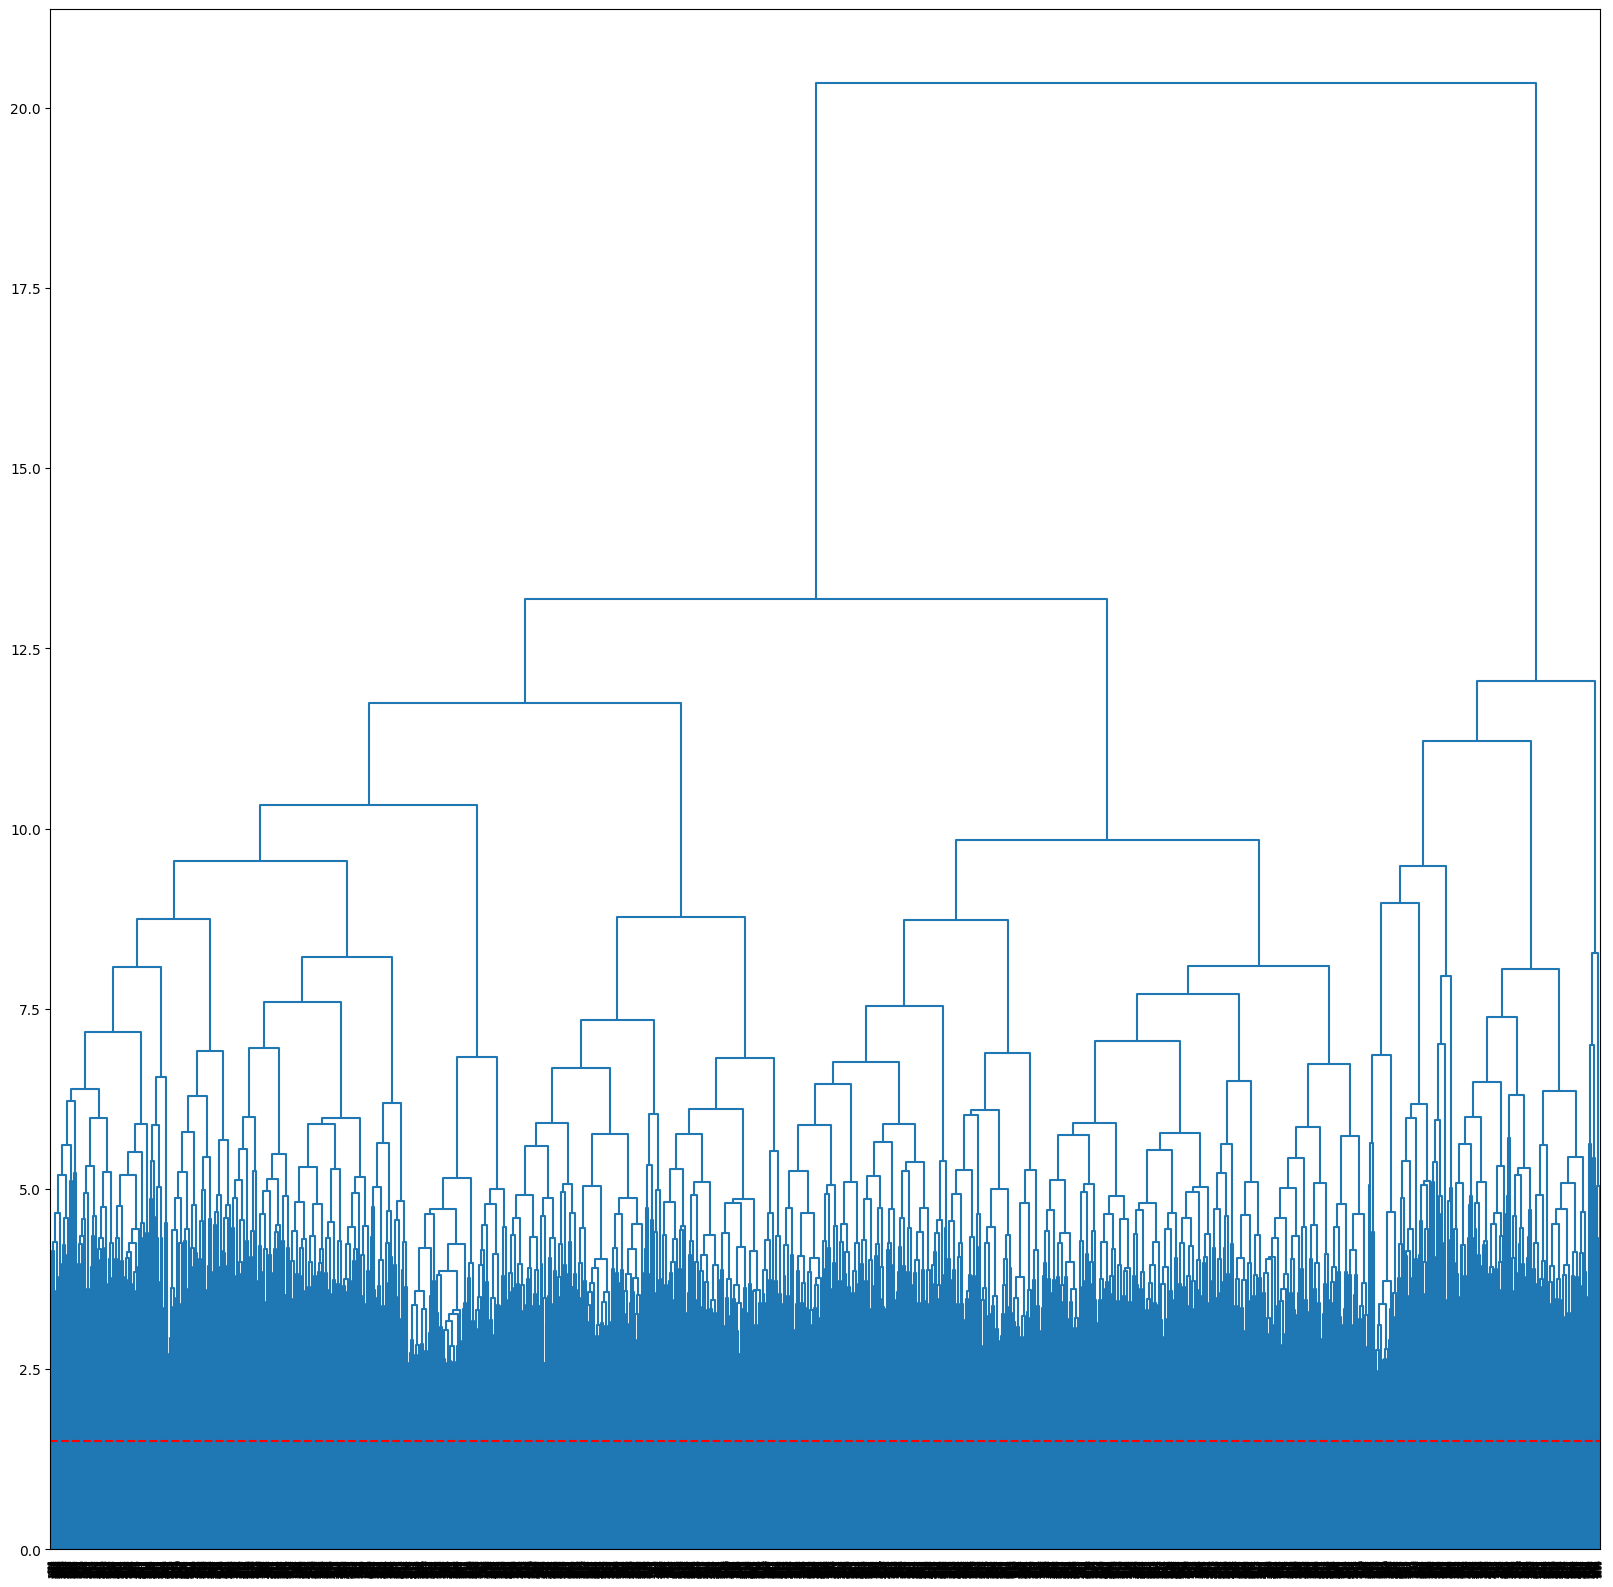

In [ ]:

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

cosine_similarities2 = cosine_similarity(df)

#cosine_dissimilarities = 1 - cosine_similarities2
#X = cosine_dissimilarities
X=cosine_similarities2

linked = linkage(X, 'complete')

plt.figure(figsize=(20, 20))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
           color_threshold=threshold)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

cluster_inertia=[]

cosine_similarities2 = cosine_similarity(df)

#cosine_dissimilarities = 1 - cosine_similarities2
#X = cosine_dissimilarities
X=cosine_similarities2

model = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold, linkage='complete')
labels = model.fit_predict(X)
Y=labels
value_silhouette_score=0
value_silhouette_score=silhouette_score(X,Y)
value_davies_bouldin_score = davies_bouldin_score(X, Y)
print(value_silhouette_score,value_davies_bouldin_score)
e={'silhouette_score':value_silhouette_score, 'davies_bouldin_score':value_davies_bouldin_score}
cluster_inertia.append(e)


0.023549071000917167 0.24337896582339877


In [ ]:
print(cluster_inertia)

[{'silhouette_score': 0.023549071000917167, 'davies_bouldin_score': 0.24337896582339877}]


In [ ]:
len(list(set(labels)))

4858

In [ ]:
lista_produtos = list(map(lambda x:x['produto'],lista_produtos_embed))
df2 = df.copy()
df2['cluster'] = labels
df2['produto'] = lista_produtos
df

,componente0,componente1,componente2,componente3,componente4,componente5,componente6,componente7,componente8,componente9,...,componente1014,componente1015,componente1016,componente1017,componente1018,componente1019,componente1020,componente1021,componente1022,componente1023
0,-0.021571,-0.562216,0.089743,0.219388,-0.955722,0.322036,-0.335170,-0.709030,0.630074,1.229450,...,0.574111,-0.614863,-0.710130,-0.395264,0.404117,0.392513,0.894582,0.124588,-0.646944,-0.055636
1,-0.067221,0.276813,0.214833,0.030875,-0.864870,-0.081484,0.086455,1.078886,0.417502,0.029938,...,0.548498,-0.344622,-0.123327,-1.235238,0.496079,0.416169,0.173805,0.455880,-0.144961,-0.185869
2,-0.069652,0.016040,0.732337,1.193550,-1.069639,-0.859732,0.729909,-0.000229,0.002312,0.451601,...,0.397316,-0.300321,0.659257,-1.521803,0.697367,1.049778,0.258827,0.020332,0.115583,-0.697766
3,-0.506065,0.211458,-0.149546,-0.549066,-0.161728,-0.279260,0.629083,0.869421,1.066289,0.455305,...,0.666102,-0.557528,-0.460101,-0.289759,0.541869,1.003588,0.635891,0.184364,-0.516524,0.298978
4,0.631491,-0.057003,-0.418897,0.302046,0.591468,0.143512,-0.516046,0.098459,-0.112373,0.540114,...,0.501379,0.223384,0.109676,-0.430208,0.666874,0.385281,-0.280646,0.530085,-0.398528,-0.560988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.506579,-0.475397,0.797187,0.432756,-0.865019,-0.506854,0.515221,0.567821,0.202640,-0.137207,...,0.575074,-0.704916,0.538222,-1.068491,0.119741,0.634903,-0.482652,-0.318976,0.560872,0.106244
4996,0.182667,0.481504,0.284632,0.637492,0.159716,-0.174611,-0.023207,-0.034162,0.391219,0.566020,...,0.824098,-0.076228,-1.225039,-0.675857,0.837400,0.303992,0.244490,0.188342,-0.720354,0.215137
4997,-0.674225,0.111773,0.059466,0.881678,-0.452042,-0.592751,0.045895,-0.366888,0.470882,0.813688,...,1.255912,-0.057772,-0.655826,-1.477663,0.345116,0.801957,0.573005,-0.101548,0.485669,-0.767395
4998,-0.101503,-0.182968,0.875998,0.231721,-0.187170,-0.578731,-0.151346,-0.438941,-0.301282,0.533442,...,1.652978,-0.704002,-0.235793,-0.193203,0.778873,0.612088,-0.052447,0.532810,0.130195,0.730119


In [ ]:
for idx in range(0,30):
    display(df2[df2['cluster']==idx]['produto'])

,produto
640,LAMPADA ELETRONICA 13WX127V
728,LAMPADA OSRAM 100127V


,produto
246,RETENTOR 3226
704,RETENTOR 19631


,produto
1151,ALCOOL ETILICO 65 GEL NEUTRO 500 G
4515,ALCOOL GEL 70 Q OTIMO 5L


,produto
1407,ROSUVASTATINA CALCICA 10 MG COMP REV CT BL AL ...
3887,ROSUVASTATINA CALCICA 5MG


,produto
3330,ENXADA COM CABO
4325,CABO PARA ENXADA


,produto
1753,"INDATRAT 1,5MG CX 30"
3371,ATACAND 8MG CX 30 COM


,produto
1635,CERA INGLEZA ARDOSIA MAX INCOLOR 750ML
1982,CERA INCOLOR 750 ML P
3936,CERA LIQUIDA BRILMAX INCOLOR 750ML


,produto
423,"PNEU 11 R22,5"
4049,PNEU 185 R15


,produto
35,LUVA GALV. 2
2782,LUVA GALV FF 2


,produto
1662,LUVA CIRURGICA ESTERIL N. 7.5 LEMGRUBER
2920,LUVA CIRURGICA ESTERIL 7.5
3615,LUVA CIRURGICA ESTERIL NO7


,produto
862,FLANELA AMAR 28X38
938,FLANELA MULTBOM 28X48 AMARELA


,produto
379,CORREIA POLY V 6PK1365
1386,CORREIA POLY V 7PK1070


,produto
1029,FILTRO AR CA 9290
3628,FILTRO AR 9621


,produto
745,MILHO PIPOCA PAPO 10 500G
3990,FAR MILHO PIRANGUINHO 500G


,produto
2909,ENVELOPE 24X34 PARDO IPECOL
3799,ENVELOPE PARDO 250X353 CELUCAT


,produto
155,REGISTRO PVC 40MM
3224,REGISTRO ESF.PVC VIQUA 20MM


,produto
2340,RECARGA TONER CE285A
3793,RECARGA TONER 53A


,produto
4142,PAPEL A4 RINO CX 10 PACOTES 500FL
4641,PAPEL A4 RINO 75 G 500 FL


,produto
1242,TUBO PVC SOLDAVEL 40MM UNOCAN
3072,TUBO PVC 20MM SOLDAVEL PLASILIT


,produto
3409,FIO INST 1.5 MM PRETO 14
4781,"FIO 2,5 MM 12 PRETO"


,produto
204,BUCHA BANDEJA SUSPENSAO DIANT
2808,BUCHA SUSPENSAO DIANT


,produto
788,HORTIFRUTIGRANJEIROS TEMPERO ALHO E SAL
3808,HORTIFRUTIGRANJEIROS TEMPERO ALHO


,produto
55,FARINHA TRIGO D BENTA S F 1KG
3118,FARINHA TRIGO ESP GUTH 1KG


,produto
395,CARTUCHO TONER T5 65
1979,CARTUCHO TONER 3536


,produto
1829,ESCADA ALUMINIO EXTENSIVA
3050,ESCADA ALUMINIO EXTENSIVA 10 DEGRAUS


,produto
1086,OLANZAPINA 5MG 30COM GEN.1
1840,OLANZAPINA 5MG 30COM C1 EUROFARMA


,produto
1774,ESPONJA ACO 60G C 8
2630,ESPONJA ACO Q LUSTRO 60G


,produto
420,FLANAX 275 MG C 20 COM
1742,FLANCOX 400MG 20CP


,produto
542,FILTRO AR SRS 6201
2542,FILTRO AR JFA 429
3501,FILTRO AR C 29003


,produto
1282,LEITE LONGA VIDA BATAVO INTEGRAL 1 L
4165,LEITE L VIDA P 1L INTEGRAL
